<a href="https://colab.research.google.com/github/AykoSousa/fraudulent_transaction/blob/master/fraudulent_transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

- tensorflow
- scikit-learn
- matplotlib
- pandas
- numpy
- pytorch

```bash
pip install -U scikit-learn
```

```bash
pip install tensorflow
```

In [2]:
!pip install -U scikit-learn tensorflow

In [3]:
# Import libs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [4]:
# Load csv
df = pd.read_csv('/content/fake_transaction_data.csv')

In [5]:
# Show head lines
df.head()

,Credit Card Number,Transaction Value,Transaction Location,Establishment Type,Transaction Time,Day of the Week,Expense Category,Cardholder Age,Cardholder Gender,Payment History,Card Limit,Current Balance,Previous Transactions,Supplementary Cards,Avg Previous Transaction Value,Foreign Transactions,Credit Utilization,Previous Suspicious Transactions,Time Since Last Transaction (days),Class (Fraud)
0,7824175924688047,4690.79,Boston,Online Retailer,18:29,Sunday,Shopping,32,Male,Poor,12456,3297.51,23,0,313.39,9,0.99,4,9,0
1,4987033617588998,1987.45,Chicago,Hotel,04:05,Friday,Health,31,Male,Average,8427,7782.27,23,3,149.73,2,0.34,1,1,0
2,1140291578112137,3108.71,Houston,Online Retailer,01:30,Sunday,Travel,22,Male,Average,5989,5698.29,34,1,176.96,9,0.93,4,11,0
3,4881081634690646,4209.28,San Francisco,Gas Station,01:14,Wednesday,Utilities,26,Male,Average,8511,14093.68,40,3,77.80,9,0.53,4,14,0
4,7829444046905,2474.19,Seattle,Restaurant,15:13,Tuesday,Shopping,54,Female,Poor,7478,14809.93,33,0,181.68,6,0.24,1,26,0


In [6]:
# Check df shape
df.shape

(2000, 20)

In [7]:
# Check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Credit Card Number                  2000 non-null   int64  
 1   Transaction Value                   2000 non-null   float64
 2   Transaction Location                2000 non-null   object 
 3   Establishment Type                  2000 non-null   object 
 4   Transaction Time                    2000 non-null   object 
 5   Day of the Week                     2000 non-null   object 
 6   Expense Category                    2000 non-null   object 
 7   Cardholder Age                      2000 non-null   int64  
 8   Cardholder Gender                   2000 non-null   object 
 9   Payment History                     2000 non-null   object 
 10  Card Limit                          2000 non-null   int64  
 11  Current Balance                     2000 no

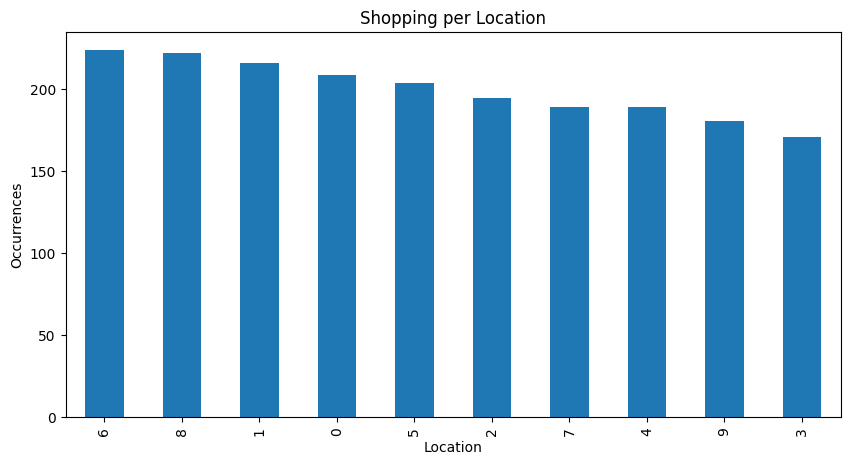

In [60]:
# Plot Shopping per Location
df['Transaction Location'].value_counts().plot(kind='bar', figsize=(10, 5), title='Shopping per Location')
plt.xlabel('Location')
plt.ylabel('Occurrences')
plt.show()

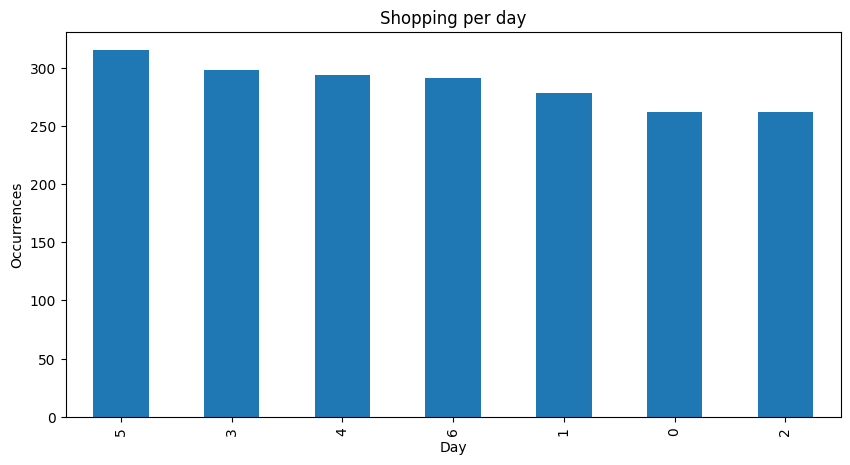

In [61]:
# PlotsShopping per day
df['Day of the Week'].value_counts().plot(kind='bar', figsize=(10, 5), title='Shopping per day')
plt.xlabel('Day')
plt.ylabel('Occurrences')
plt.show()

## Preparing data to apply to models

### Columns:

- Transaction Location                2000 non-null   object
- Establishment Type                  2000 non-null   object
- Transaction Time                    2000 non-null   object
- Day of the Week                     2000 non-null   object
- Expense Category                    2000 non-null   object
- Cardholder Gender                   2000 non-null   object
- Payment History                     2000 non-null   object

In [10]:
# Convert object variables in number
df['Transaction Location'] = pd.Categorical(df['Transaction Location']).codes
df['Establishment Type'] = pd.Categorical(df['Establishment Type']).codes
df['Transaction Time'] = pd.Categorical(df['Transaction Time']).codes
df['Day of the Week'] = pd.Categorical(df['Day of the Week']).codes
df['Expense Category'] = pd.Categorical(df['Expense Category']).codes
df['Cardholder Gender'] = pd.Categorical(df['Cardholder Gender']).codes
df['Payment History'] = pd.Categorical(df['Payment History']).codes

## Separating training and testing data

y = Class (Fraud)

In [11]:
# Train test
X = df.drop('Class (Fraud)', axis=1)
y = df['Class (Fraud)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=486)

## Training models

### KNN

In [12]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [13]:
# score
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'F1 Score: {f1_score(y_test, y_pred_knn)}')
print(f'Precision: {precision_score(y_test, y_pred_knn)}')
print(f'Recall: {recall_score(y_test, y_pred_knn)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_knn)}')

Accuracy: 0.93
F1 Score: 0.0
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[372   1]
 [ 27   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       373
           1       0.00      0.00      0.00        27

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.87      0.93      0.90       400



Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

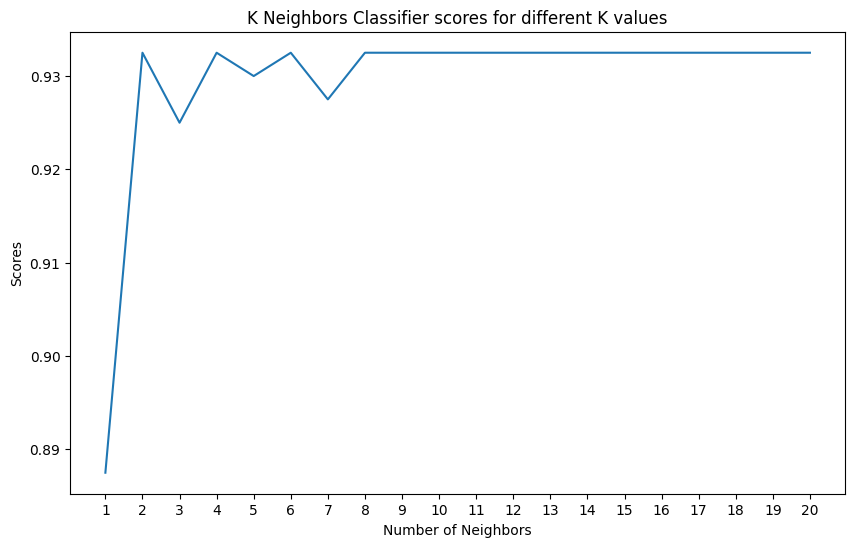

In [14]:
# Evaluating the model score if the number of neighbors increases
scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), scores)
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")
plt.title("K Neighbors Classifier scores for different K values")

In [15]:
print(max(scores))

0.9325


In [16]:
# Fitting model with the best number of neighbors
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [17]:
# Score
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'F1 Score: {f1_score(y_test, y_pred_knn)}')
print(f'Precision: {precision_score(y_test, y_pred_knn)}')
print(f'Recall: {recall_score(y_test, y_pred_knn)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_knn)}')

Accuracy: 0.9325
F1 Score: 0.0
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[373   0]
 [ 27   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       373
           1       0.00      0.00      0.00        27

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.87      0.93      0.90       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

### Naive Bayes

In [18]:
# Naive Bayes
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [19]:
# Score
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb)}')
print(f'F1 Score: {f1_score(y_test, y_pred_nb)}')
print(f'Precision: {precision_score(y_test, y_pred_nb)}')
print(f'Recall: {recall_score(y_test, y_pred_nb)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_nb)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_nb)}')

Accuracy: 0.9325


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score: 0.0
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[373   0]
 [ 27   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       373
           1       0.00      0.00      0.00        27

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.87      0.93      0.90       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## SVM

In [20]:
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [21]:
# Score
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(f'F1 Score: {f1_score(y_test, y_pred_svm)}')
print(f'Precision: {precision_score(y_test, y_pred_svm)}')
print(f'Recall: {recall_score(y_test, y_pred_svm)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_svm)}')

Accuracy: 0.9325

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



F1 Score: 0.0
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[373   0]
 [ 27   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       373
           1       0.00      0.00      0.00        27

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.87      0.93      0.90       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=215)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [23]:
# Scores
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf)}')
print(f'Precision: {precision_score(y_test, y_pred_rf)}')
print(f'Recall: {recall_score(y_test, y_pred_rf)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_rf)}')

Accuracy: 0.9325
F1 Score: 0.0
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[373   0]
 [ 27   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       373
           1       0.00      0.00      0.00        27

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.87      0.93      0.90       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

[Text(0.5749990765366431, 0.9736842105263158, 'Transaction Time <= 12.5\ngini = 0.094\nsamples = 1001\nvalue = [1521, 79]\nclass = 0'),
 Text(0.46012485224586286, 0.9210526315789473, 'Transaction Time <= 11.5\ngini = 0.42\nsamples = 9\nvalue = [14, 6]\nclass = 0'),
 Text(0.517561964391253, 0.9473684210526316, 'True  '),
 Text(0.4506685874704492, 0.868421052631579, 'Current Balance <= 14705.96\ngini = 0.124\nsamples = 8\nvalue = [14, 1]\nclass = 0'),
 Text(0.44121232269503546, 0.8157894736842105, 'gini = 0.0\nsamples = 7\nvalue = [14, 0]\nclass = 0'),
 Text(0.46012485224586286, 0.8157894736842105, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.4695811170212766, 0.868421052631579, 'gini = 0.0\nsamples = 1\nvalue = [0, 5]\nclass = 1'),
 Text(0.6898733008274232, 0.9210526315789473, 'Avg Previous Transaction Value <= 434.81\ngini = 0.088\nsamples = 992\nvalue = [1507, 73]\nclass = 0'),
 Text(0.6324361886820331, 0.9473684210526316, '  False'),
 Text(0.4979499113475177, 0.8684

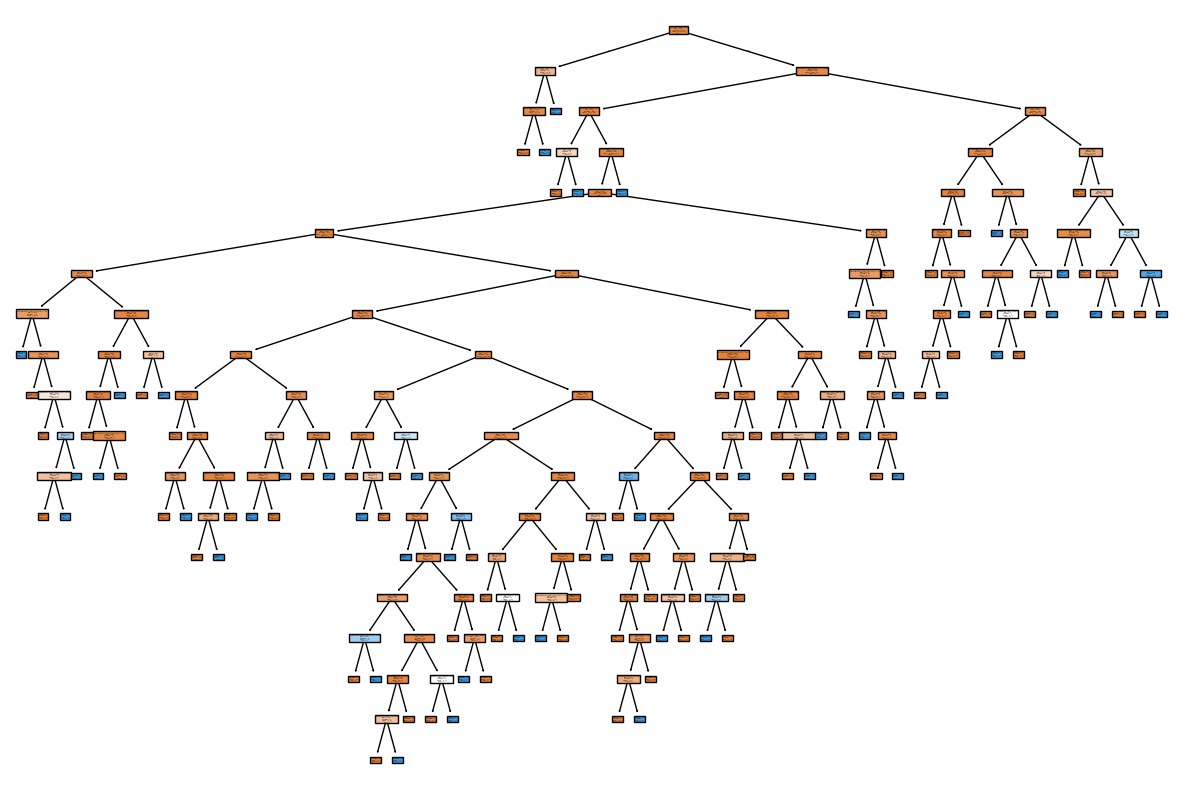

In [24]:
# Plot decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['0', '1'], filled=True)

### Logistic Regression

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [26]:
# Score
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(f'F1 Score: {f1_score(y_test, y_pred_lr)}')
print(f'Precision: {precision_score(y_test, y_pred_lr)}')
print(f'Recall: {recall_score(y_test, y_pred_lr)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_lr)}')

Accuracy: 0.9325
F1 Score: 0.0
Precision: 0.0
Recall: 0.0
Confusion Matrix:
[[373   0]
 [ 27   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       373
           1       0.00      0.00      0.00        27

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.87      0.93      0.90       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

### Neural Network

In [27]:
# Neural Network Tensorflow
import tensorflow as tf

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(19,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.fit(X_train, y_train, epochs=100)

model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9029 - loss: 28168364752896.0000
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8909 - loss: 27627863670784.0000
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9192 - loss: 19012970872832.0000
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9243 - loss: 18699308236800.0000
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9067 - loss: 20100551802880.0000
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8906 - loss: 18167095099392.0000
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9223 - loss: 17377824604160.0000
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8979 - loss: 12200451244032.0000
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9247 - loss: 11090480070656.0000
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 13021273391104.0000
Epoch 11/100
50/50 

[5012485632.0, 0.06750000268220901]

## Neural Network Pytorch

In [32]:
# Pytorch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train_torch, X_test_torch, y_train_torch, y_test_torch = train_test_split(X_scaled, y, test_size=0.2, random_state=486)

X_train_torch = torch.tensor(X_train_torch, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_torch, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_torch.values, dtype=torch.float32)
y_test_torch = torch.tensor(y_test_torch.values, dtype=torch.float32)

In [44]:
class FraudDetector(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FraudDetector, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

model = FraudDetector(input_size=X_train_torch.shape[1], hidden_size=64, output_size=1)

In [45]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [57]:
num_epochs = 850

for epoch in range(num_epochs):
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch.unsqueeze(1).float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/850], Loss: 0.0089
Epoch [2/850], Loss: 0.0089
Epoch [3/850], Loss: 0.0089
Epoch [4/850], Loss: 0.0089
Epoch [5/850], Loss: 0.0089
Epoch [6/850], Loss: 0.0089
Epoch [7/850], Loss: 0.0088
Epoch [8/850], Loss: 0.0088
Epoch [9/850], Loss: 0.0088
Epoch [10/850], Loss: 0.0088
Epoch [11/850], Loss: 0.0088
Epoch [12/850], Loss: 0.0088
Epoch [13/850], Loss: 0.0088
Epoch [14/850], Loss: 0.0088
Epoch [15/850], Loss: 0.0087
Epoch [16/850], Loss: 0.0087
Epoch [17/850], Loss: 0.0087
Epoch [18/850], Loss: 0.0087
Epoch [19/850], Loss: 0.0087
Epoch [20/850], Loss: 0.0087
Epoch [21/850], Loss: 0.0087
Epoch [22/850], Loss: 0.0086
Epoch [23/850], Loss: 0.0086
Epoch [24/850], Loss: 0.0086
Epoch [25/850], Loss: 0.0086
Epoch [26/850], Loss: 0.0086
Epoch [27/850], Loss: 0.0086
Epoch [28/850], Loss: 0.0086
Epoch [29/850], Loss: 0.0085
Epoch [30/850], Loss: 0.0085
Epoch [31/850], Loss: 0.0085
Epoch [32/850], Loss: 0.0085
Epoch [33/850], Loss: 0.0085
Epoch [34/850], Loss: 0.0085
Epoch [35/850], Loss: 0

In [58]:
with torch.no_grad():
    outputs = model(X_test_torch)

print(f'Accuracy: {accuracy_score(y_test_torch, outputs.round())}')
print(f'F1 Score: {f1_score(y_test_torch, outputs.round())}')
print(f'Precision: {precision_score(y_test_torch, outputs.round())}')
print(f'Recall: {recall_score(y_test_torch, outputs.round())}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_torch, outputs.round())}')

Accuracy: 0.9075
F1 Score: 0.05128205128205128
Precision: 0.08333333333333333
Recall: 0.037037037037037035
Confusion Matrix:
[[362  11]
 [ 26   1]]
